# Customer Churn Prediction Project
## Introduction

Customer churn, also known as customer attrition, refers to the phenomenon where customers cease their relationship with a business or service. It is a critical challenge for companies across various industries, including banking. Being able to predict customer churn can provide valuable insights to companies, allowing them to take proactive measures to retain customers and improve customer satisfaction.

In this Jupyter notebook project, we will explore a dataset called "Bank Customer Churn Prediction." This dataset contains information about bank customers and their characteristics, such as credit score, country, gender, age, tenure, balance, and more. We will leverage this dataset to build a predictive model that can identify potential churners.

The project will be divided into the following sections:

1. **Data Loading and Exploration**: We will begin by loading the dataset into our notebook and gaining an understanding of its structure and content. We will explore the different variables, check for missing values, and perform any necessary data cleaning steps.

2. **Data Visualization**: Visualizations can provide valuable insights into the relationships between different variables and help identify patterns and trends. We will create visualizations using libraries like Matplotlib or Seaborn to explore the data further.

3. **Data Preprocessing**: Before training a predictive model, we need to preprocess the data. This step involves handling categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.

4. **Model Training and Evaluation**: We will select a suitable machine learning algorithm and train it on the preprocessed data. We will evaluate the model's performance using appropriate metrics and make any necessary adjustments to improve its predictive capabilities.

5. **Customer Churn Prediction**: Using the trained model, we will make churn predictions on new, unseen data. We will discuss the importance of interpretability and explore methods to interpret the model's predictions.

By the end of this project, you will have gained hands-on experience in reading, cleaning, visualizing, and predicting customer churn using machine learning techniques. So, let's get started!


In [55]:
# Loading of required modules
import pandas as pd
import seaborn as sns
import numpy as numpy
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

## 1. Data Loading and Exploration

In [56]:
# Read the dataset
df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get the dimensions of the dataset
print("\nDataset dimensions:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Check the data types of each column
print("\nData types of the columns:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Get summary statistics of the numerical columns
print("\nSummary statistics:")
print(df.describe())


First few rows of the dataset:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Dataset dimensions:
Number of rows: 10000
Number of columns: 12

Data types of the columns:

The dataset consists of information about 10,000 bank customers. Here are some key findings:

- The dataset contains various attributes such as credit score, country, gender, age, tenure, balance, products number, credit card status, active membership, estimated salary, and churn.

- The dataset is complete, with no missing values in any of the columns.

- Customers have an average credit score of 650.53, with a standard deviation of 96.65.

- The average age of customers is approximately 38.92 years, with a standard deviation of 10.49.

- Customers have an average tenure of 5.01, indicating the average duration of their relationship with the bank.

- The average balance across all customers is approximately 76,485.89 USD, with a standard deviation of 62,397.41 USD.

- Most customers have one product, with an average of 1.53 products per customer.

- Around 70.55% of customers have a credit card, while approximately 51.51% are active members.

- The estimated salary of customers ranges from 11.58 USD to 199,992.48 USD, with an average of 100,090.24 USD.

- The churn rate is 20.37%, suggesting that approximately one-fifth of the customers have churned.

## 2. Data Visualization

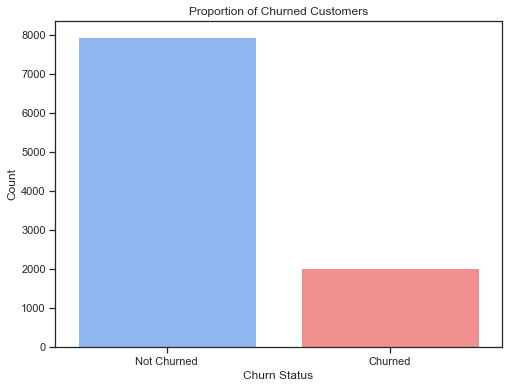

In [65]:
# Create a countplot to visualize the proportion of churned customers

# Adjust the figure size and fontsize
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

sns.countplot(data=df, x='churn', palette=['#7FB3FF', '#FF7F7F'])
plt.title('Proportion of Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.savefig('graphs/churnd_or_not_churned.png',dpi = 300)
plt.show()

<Figure size 576x432 with 0 Axes>

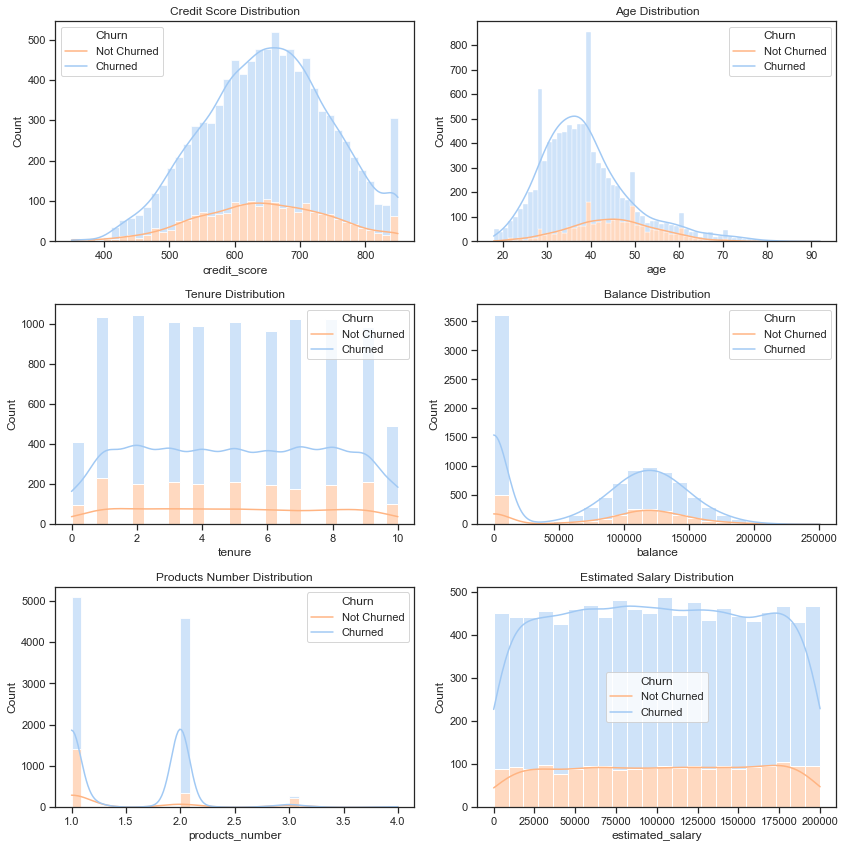

In [66]:
# Set a pastel color palette
colors = ['#A9CCE3', '#F5B7B1']
# Adjust the figure size and fontsize
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot credit score distribution
ax = sns.histplot(data=df, x='credit_score', hue='churn', kde=True, multiple='stack', ax=axes[0, 0])
ax.set_title('Credit Score Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Plot age distribution
ax = sns.histplot(data=df, x='age', hue='churn', kde=True, multiple='stack', ax=axes[0, 1])
ax.set_title('Age Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Plot tenure distribution
ax = sns.histplot(data=df, x='tenure', hue='churn', kde=True, multiple='stack', ax=axes[1, 0])
ax.set_title('Tenure Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Plot balance distribution
ax = sns.histplot(data=df, x='balance', hue='churn', kde=True, multiple='stack', ax=axes[1, 1])
ax.set_title('Balance Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Plot products_number distribution
ax = sns.histplot(data=df, x='products_number', hue='churn', kde=True, multiple='stack', ax=axes[2, 0])
ax.set_title('Products Number Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Plot estimated_salary distribution
ax = sns.histplot(data=df, x='estimated_salary', hue='churn', kde=True, multiple='stack', ax=axes[2, 1])
ax.set_title('Estimated Salary Distribution')
ax.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust spacing between subplots
plt.tight_layout()


plt.savefig('graphs/dist_continuous_variables.png',dpi = 300)

# Display the plots
plt.show()

<ipython-input-68-44b9fc179c01>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])


<Figure size 576x432 with 0 Axes>

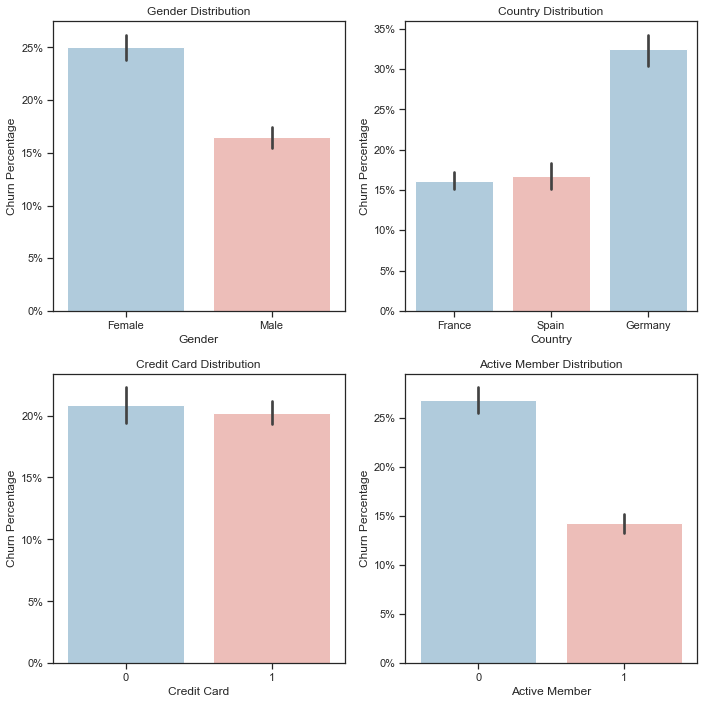

In [68]:
# Set a pastel color palette
colors = ['#A9CCE3', '#F5B7B1']
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Calculate the total count for each category
total_counts = df['gender'].value_counts()

# Plot gender distribution
sns.barplot(data=df, x='gender', y='churn', palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Churn Percentage')

# Calculate the total count for each category
total_counts = df['country'].value_counts()

# Plot country distribution
sns.barplot(data=df, x='country', y='churn', palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Country Distribution')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Churn Percentage')

# Calculate the total count for each category
total_counts = df['credit_card'].value_counts()

# Plot credit_card distribution
sns.barplot(data=df, x='credit_card', y='churn', palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Credit Card Distribution')
axes[1, 0].set_xlabel('Credit Card')
axes[1, 0].set_ylabel('Churn Percentage')

# Calculate the total count for each category
total_counts = df['active_member'].value_counts()

# Plot active_member distribution
sns.barplot(data=df, x='active_member', y='churn', palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Active Member Distribution')
axes[1, 1].set_xlabel('Active Member')
axes[1, 1].set_ylabel('Churn Percentage')

# Convert y-axis labels to percentages
for ax in axes.flatten():
    ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('graphs/dist_categorical_variables.png',dpi = 300)
# Display the plots
plt.show()


## 3. Data Preprocessing

### Feature Analysis

The aim of this part of the code is to perform a comprehensive analysis of the dataset's features and their relationships. By calculating the correlation matrix, we aim to uncover any linear associations between continuous variables, which helps us understand how changes in one variable may impact another. Additionally, conducting the chi-square analysis allows us to examine the dependence between categorical variables and identify any significant associations. This information is crucial for gaining insights into the underlying patterns, dependencies, and potential predictors within the dataset. Ultimately, this analysis aids in feature selection, identifying key variables, and understanding the factors that may influence the target variable or outcome of interest.

Correlation Matrix:
                  credit_score       age    tenure   balance  products_number  \
credit_score          1.000000 -0.003965  0.000842  0.006268         0.012238   
age                  -0.003965  1.000000 -0.009997  0.028308        -0.030680   
tenure                0.000842 -0.009997  1.000000 -0.012254         0.013444   
balance               0.006268  0.028308 -0.012254  1.000000        -0.304180   
products_number       0.012238 -0.030680  0.013444 -0.304180         1.000000   
estimated_salary     -0.001384 -0.007201  0.007784  0.012797         0.014204   

                  estimated_salary  
credit_score             -0.001384  
age                      -0.007201  
tenure                    0.007784  
balance                   0.012797  
products_number           0.014204  
estimated_salary          1.000000  


<Figure size 576x432 with 0 Axes>

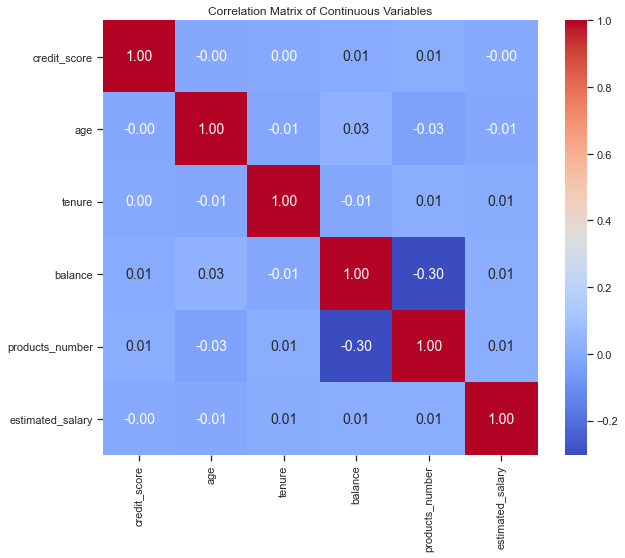

In [69]:
# Select the continuous variables
continuous_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Create a correlation matrix
corr_matrix = df[continuous_columns].corr()

# Print the correlation matrix with raw values
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))  # Set the figure size as desired
plt.rcParams.update({'font.size': 14})  # Set the desired fontsize

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Continuous Variables')
plt.savefig('graphs/corr_matrix.png',dpi = 300)

plt.show()


Looking at the correlation matrix of the continuous variables, we can observe the following:

- Credit Score: It shows very weak correlation with all other variables, indicating that it may not have a significant impact on the other variables or the churn rate. It could be a candidate for dropping.

- Age: There is no strong correlation with any other variable. However, age is often considered an important factor in predicting churn, so it may still be valuable to retain.

- Tenure: It has a very weak positive correlation with estimated salary. This suggests that customers with longer tenure may have slightly higher estimated salaries, but the correlation is not strong enough to conclude a significant impact on churn.

- Balance: There is a weak negative correlation with products number, indicating that customers with higher balances may have fewer products. However, the correlation is not strong enough to make a definite conclusion about its impact on churn.

- Products Number: It has a weak negative correlation with balance, suggesting that customers with more products may have lower balances. However, the correlation is not strong enough to make a conclusive judgment about its impact on churn.

- Estimated Salary: It shows no strong correlation with any other variable, indicating that it may not have a significant impact on the other variables or the churn rate. It could be a candidate for dropping.

Based on these observations, the variables that could potentially be dropped are "credit_score" and "estimated_salary" as they exhibit weak correlations with other variables. However, it is important to further analyze these variables and consider other factors before making a final decision on variable selection.

In [50]:
categorical_columns = ['active_member', 'credit_card', 'gender', 'country']
chi2_array, p_array = [], []

target_variable = 'churn'  # Replace with the actual target variable column name

for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df[target_variable])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical_columns,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi = df_chi.sort_values(by='Chi-square', ascending=False)

print(df_chi)


        Variable  Chi-square       p-value
3        country  301.255337  3.830318e-66
0  active_member  242.985342  8.785858e-55
2         gender  112.918571  2.248210e-26
1    credit_card    0.471338  4.923724e-01


**Based on the chi-square test results, we can conclude the following:**

- Country: The country variable shows a significant association with the churn rate, as indicated by the high chi-square value and very low p-value. Therefore, the country variable has an impact on the churn rate.

- Active Member: The active_member variable also demonstrates a significant association with the churn rate, as evidenced by the high chi-square value and very low p-value. Hence, the active_member variable affects the churn rate.

- Gender: The gender variable exhibits a moderate association with the churn rate, as indicated by a relatively high chi-square value and low p-value. Therefore, the gender variable has an impact on the churn rate.

- Credit Card: The credit_card variable shows no significant association with the churn rate, as the chi-square value is relatively low and the p-value is above the typical significance level of 0.05. Thus, the credit_card variable does not appear to have an impact on the churn rate.

In summary, country, active_member, and gender variables have an impact on the churn rate, while the credit_card variable does not. 

**Based on the two previous analysis, the variables  "credit_card", "credit_score" and "estimated_salary" will be dropped**

In [51]:
# Drop the specified variables from the dataset
df = df.drop(["credit_card", "credit_score", "estimated_salary","customer_id"], axis=1)

### Encoding of categorical descriptors

In [52]:
# Create a copy of the original dataset
df_encoded = df.copy()

# Perform one-hot encoding for gender and country variables
categorical_columns = ['gender', 'country']
df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns)

# Perform label encoding for active_member variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded['active_member'] = label_encoder.fit_transform(df_encoded['active_member'])

# Print the encoded dataset
print(df_encoded.head())

df = df_encoded


   age  tenure    balance  products_number  active_member  churn  \
0   42       2       0.00                1              1      1   
1   41       1   83807.86                1              1      0   
2   42       8  159660.80                3              0      1   
3   39       1       0.00                2              0      0   
4   43       2  125510.82                1              1      0   

   gender_Female  gender_Male  country_France  country_Germany  country_Spain  
0              1            0               1                0              0  
1              1            0               0                0              1  
2              1            0               1                0              0  
3              1            0               1                0              0  
4              1            0               0                0              1  


### Min-Max scaling

Scaling is important in machine learning to ensure variables are on a similar scale. Min-Max scaling, or normalization, transforms data to a fixed range (e.g., 0-1). It preserves relative relationships between data points, benefits non-Gaussian distributions, and improves algorithm performance and convergence. Scaling eliminates bias from variables with larger magnitudes and facilitates accurate predictions.

In [53]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select the continuous descriptors to be scaled
continuous_descriptors = ['age', 'tenure', 'balance', 'products_number']

# Apply Min-Max scaling to the selected descriptors
df[continuous_descriptors] = scaler.fit_transform(df[continuous_descriptors])


## Model Training and Evaluation